## Loading library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from concurrent.futures import ThreadPoolExecutor

C:\Users\SHOLAY\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Loading Dataset

In [2]:
train_data= pd.read_csv('train.csv', parse_dates= ['Date'], index_col= ['Date'])
test_data = pd.read_csv('test.csv', parse_dates= ['Date'], index_col= ['Date'])

C:\Users\SHOLAY\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Data overview

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2015-07-31 to 2013-01-01
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Sales          1017209 non-null  int64 
 3   Customers      1017209 non-null  int64 
 4   Open           1017209 non-null  int64 
 5   Promo          1017209 non-null  int64 
 6   StateHoliday   1017209 non-null  object
 7   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 69.8+ MB


In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41088 entries, 2015-09-17 to 2015-08-01
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Open           41077 non-null  float64
 4   Promo          41088 non-null  int64  
 5   StateHoliday   41088 non-null  object 
 6   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 2.5+ MB


In [5]:
train_data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


In [6]:
test_data.head()

,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,
2015-09-17,1,1,4,1.0,1,0,0
2015-09-17,2,3,4,1.0,1,0,0
2015-09-17,3,7,4,1.0,1,0,0
2015-09-17,4,8,4,1.0,1,0,0
2015-09-17,5,9,4,1.0,1,0,0


# Check for seasonality in both training and test sets - are the seasons similar between these two groups?

## Sales trend overtime

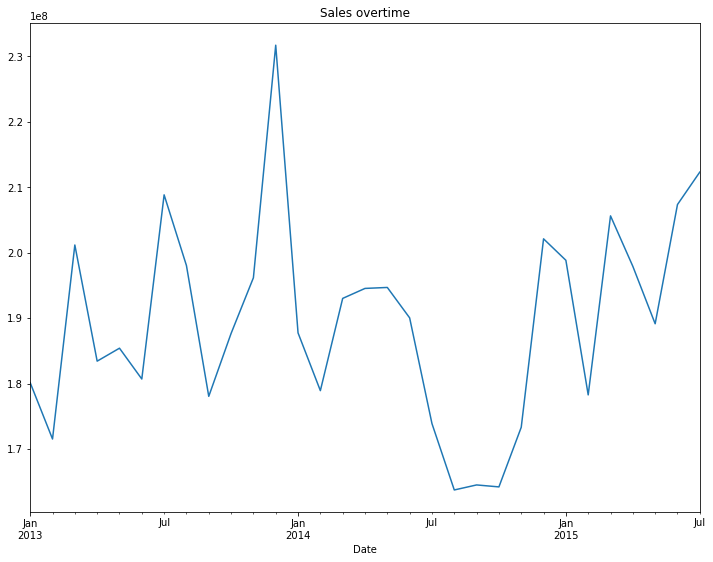

In [7]:
train_data['Sales'].resample('m').sum().plot(figsize= (12, 9)).set_title("Sales overtime");

From the above visualization the sales tends to go higher in the year 2013 and started to decrease in the year 2014.
This is to test whether the number of customers will also increase.

### Data record in each year

Text(0.5, 1.0, 'Training data record')

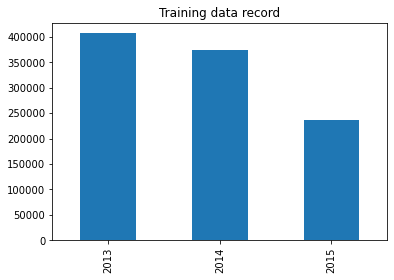

In [8]:
train_data.index.year.value_counts().plot.bar().set_title("Training data record") # Overview of the data store in each year by counting their occurrence

Text(0.5, 1.0, 'Testing data record')

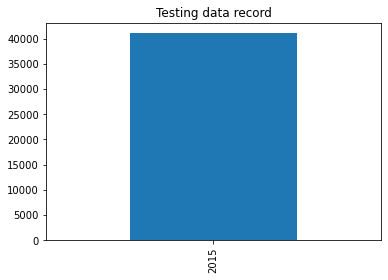

In [9]:
test_data.index.year.value_counts().plot.bar().set_title("Testing data record") # Overview of the data store in each year by counting their occurrence

In [10]:
print(f'2015 Train data: {len(train_data[train_data.index.year == 2015])} of {len(train_data)}')

2015 Train data: 236380 of 1017209


## There tends to be some similarities between the train dataset and test dataset. All data in test dataset were in the year 2015 whereas the train dataset also have about ```236,380``` rows of data in the year 2015 out of ```1,017,209``` rows

# Check & compare sales behavior before, during and after holidays

In [11]:
train_data['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

Balancing the inconsistent data

In [12]:
train_data['StateHoliday']= train_data['StateHoliday'].replace(0, '0')

In [13]:
behaviour= train_data.pivot_table(index= ['StateHoliday'], values= ['Sales'], aggfunc= 'sum')

In [14]:
behaviour

,Sales
StateHoliday,
0,5865164768
a,5890305
b,1433744
c,691806


In [15]:
behaviour.index= ['None', 'Public holiday', 'Easter holiday', 'Christmas']

In [16]:
behaviour

,Sales
None,5865164768
Public holiday,5890305
Easter holiday,1433744
Christmas,691806


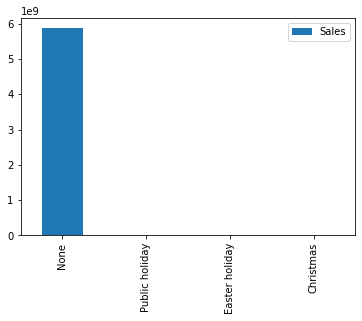

In [17]:
behaviour.plot.bar()

There is more sales before the holiday

# Find out any seasonal (Christmas, Easter etc) purchase behaviours

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

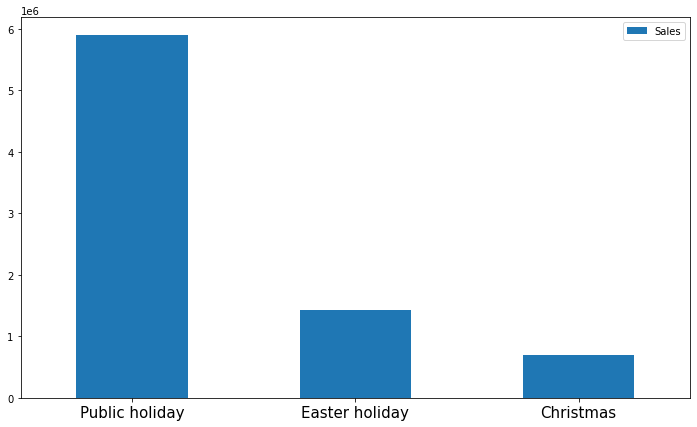

In [21]:
behaviour.iloc[1:, :].plot.bar(figsize= (12, 7))
plt.xticks(rotation= 360, fontsize= 15)

### There tends to be more purchase during the $Public$ $holiday$

# What can you say about the correlation between sales and number of customers?

Text(0.5, 1.0, 'Sales vs Customers')

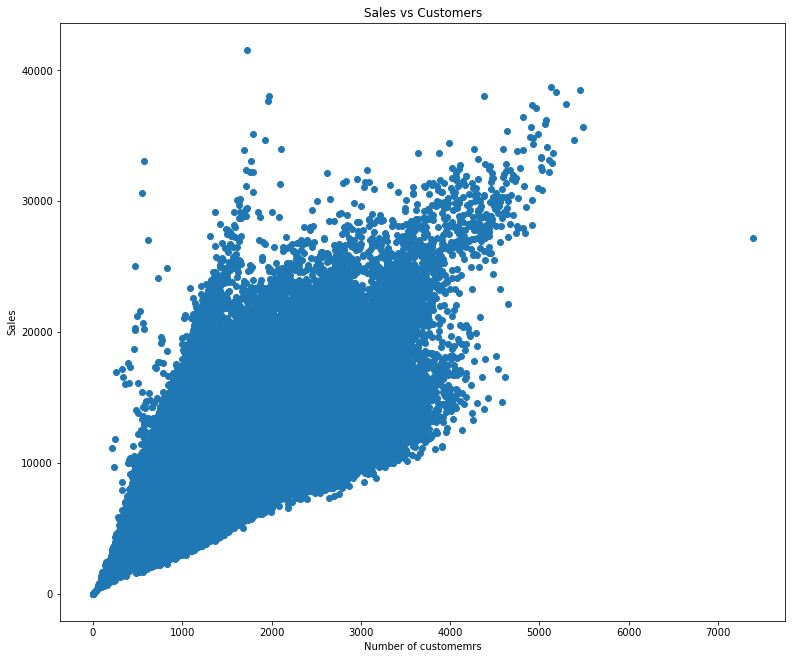

In [26]:
plt.figure(figsize= (13, 11))
plt.scatter( train_data['Customers'], train_data['Sales'])
plt.ylabel("Sales")
plt.xlabel("Number of customemrs")
plt.title("Sales vs Customers")

# How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?

No promo

In [32]:
no_promo= train_data[train_data['Promo']==0]
no_promo.tail()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2013-01-01,1111,2,0,0,0,0,a,1
2013-01-01,1112,2,0,0,0,0,a,1
2013-01-01,1113,2,0,0,0,0,a,1
2013-01-01,1114,2,0,0,0,0,a,1
2013-01-01,1115,2,0,0,0,0,a,1


In [31]:
promo= train_data[train_data['Promo']== 1]
promo.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1
